<a href="https://www.kaggle.com/code/ssshayan/multiple-regression?scriptVersionId=106182314" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Creating different models on Grades Dataset
#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

## 1. Data preprocessing

In [2]:
df=pd.read_csv(r'../input/grades-of-students/Grades.csv')

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

## Renaming Headers ( since course codes are in the format XX-XXX)

In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [6]:
# few headers have inconsistent naming we rename them to ease access later and for the sake of convention of course codes
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

## Dropping inconsistent columns 

In [8]:
# Since seat number doesnot seem like a strong predictor of cgpa we drop it
df.drop(['Seat No.'],axis='columns',inplace=True)

In [9]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


## Treating missing values 

In [10]:
missingdata=df.isnull()

In [11]:
#returns counts of values where True if null
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")    

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    570
True       1
Name: CY-105, dtype: int64

HS-105
False    570
True       1
Name: HS-105, dtype: int64

MT-111
False    569
True       2
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    569
True       2
Name: CS-106, dtype: int64

EL-102
False    569
True       2
Name: EL-102, dtype: int64

EE-119
False    569
True       2
Name: EE-119, dtype: int64

ME-107
False    569
True       2
Name: ME-107, dtype: int64

CS-107
False    569
True       2
Name: CS-107, dtype: int64

HS-205
False    566
True       5
Name: HS-205, dtype: int64

MT-222
False    566
True       5
Name: MT-222, dtype: int64

EE-222
False    564
True       7
Name: EE-222, dtype: int64

MT-224
False    564
True       7
Name: MT-224, dtype: int64

CS-210
False    564
True       7
Name: CS-210, dtype: int64

CS-211
False    566
True       5
Name: CS-211, dtype: int64

CS

Many columns have missing values we must treat them.

In [12]:
# returns records where HS-205 has null values
df[df['HS-205'].isnull()]

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
137,C-,C+,WU,WU,WU,B,WU,WU,A-,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,C+,B-,B,A-,A,A-,C,WU,A-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,D,D,WU,WU,WU,D,WU,WU,D,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
565,F,F,D,C-,NaN,D+,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


In [13]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
# replaces missing data with modes

df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [14]:
#confirmation that all null values are replaced 
for column in df_most_common_imputed.isnull().columns.values.tolist():
    print(column)
    print (df_most_common_imputed.isnull()[column].value_counts())
    print("")

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    571
Name: CY-105, dtype: int64

HS-105
False    571
Name: HS-105, dtype: int64

MT-111
False    571
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    571
Name: CS-106, dtype: int64

EL-102
False    571
Name: EL-102, dtype: int64

EE-119
False    571
Name: EE-119, dtype: int64

ME-107
False    571
Name: ME-107, dtype: int64

CS-107
False    571
Name: CS-107, dtype: int64

HS-205
False    571
Name: HS-205, dtype: int64

MT-222
False    571
Name: MT-222, dtype: int64

EE-222
False    571
Name: EE-222, dtype: int64

MT-224
False    571
Name: MT-224, dtype: int64

CS-210
False    571
Name: CS-210, dtype: int64

CS-211
False    571
Name: CS-211, dtype: int64

CS-203
False    571
Name: CS-203, dtype: int64

CS-214
False    571
Name: CS-214, dtype: int64

EE-217
False    571
Name: EE-217, dtype: int64

CS-212
False    571
Name: CS-212, dtype:

## Comparing value counts before after 

In [15]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

In [16]:
# this is the dataframe we imputed with modes
for i in df_most_common_imputed.columns:
    x = df_most_common_imputed[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

## Removing records with inconsistent grades
Note: These grades are consistent to be fair, they have a meaning but for simplicity I removed them ; generally we should'nt since they hold a meaning and have their own weight in prediction of target.

In [17]:
# locates records with Wu and W then drops by their indices
DF=df_most_common_imputed   
for i in DF.columns:
    DF.drop(DF[(DF.loc[:,i]=='WU')| (DF.loc[:,i]=='W')].index,inplace=True)

In [18]:
DF.reset_index(drop=True,inplace=True)

In [19]:
DF

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [20]:
# confirms the removal of WU and W graded records
for column in DF.columns.values.tolist():
    print(column)
    print (DF[column].isin(['WU','W']).value_counts())
    print("")

PH-121
False    547
Name: PH-121, dtype: int64

HS-101
False    547
Name: HS-101, dtype: int64

CY-105
False    547
Name: CY-105, dtype: int64

HS-105
False    547
Name: HS-105, dtype: int64

MT-111
False    547
Name: MT-111, dtype: int64

CS-105
False    547
Name: CS-105, dtype: int64

CS-106
False    547
Name: CS-106, dtype: int64

EL-102
False    547
Name: EL-102, dtype: int64

EE-119
False    547
Name: EE-119, dtype: int64

ME-107
False    547
Name: ME-107, dtype: int64

CS-107
False    547
Name: CS-107, dtype: int64

HS-205
False    547
Name: HS-205, dtype: int64

MT-222
False    547
Name: MT-222, dtype: int64

EE-222
False    547
Name: EE-222, dtype: int64

MT-224
False    547
Name: MT-224, dtype: int64

CS-210
False    547
Name: CS-210, dtype: int64

CS-211
False    547
Name: CS-211, dtype: int64

CS-203
False    547
Name: CS-203, dtype: int64

CS-214
False    547
Name: CS-214, dtype: int64

EE-217
False    547
Name: EE-217, dtype: int64

CS-212
False    547
Name: CS-212, dtype:

In [21]:
DF['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F'],
      dtype=object)

## Encoding Categorical Values

The grades are encoded with the GPAs they are equivalent to

In [22]:
for column in DF.columns:
    
    DF[column]=DF[column].replace('A+',4.0)
    DF[column]=DF[column].replace('A',4.0)
    DF[column]=DF[column].replace('A-',3.7)
    DF[column]=DF[column].replace('B+',3.4)
    DF[column]=DF[column].replace('B',3.0)
    DF[column]=DF[column].replace('B-',2.7)
    DF[column]=DF[column].replace('C+',2.4)
    DF[column]=DF[column].replace('C',2.0)
    DF[column]=DF[column].replace('C-',1.7)
    DF[column]=DF[column].replace('D+',1.4)
    DF[column]=DF[column].replace('D',1.0)
    DF[column]=DF[column].replace('F',0.0)

In [23]:
DF.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

## Visualizing correlation by heatmap and further checking feature significance

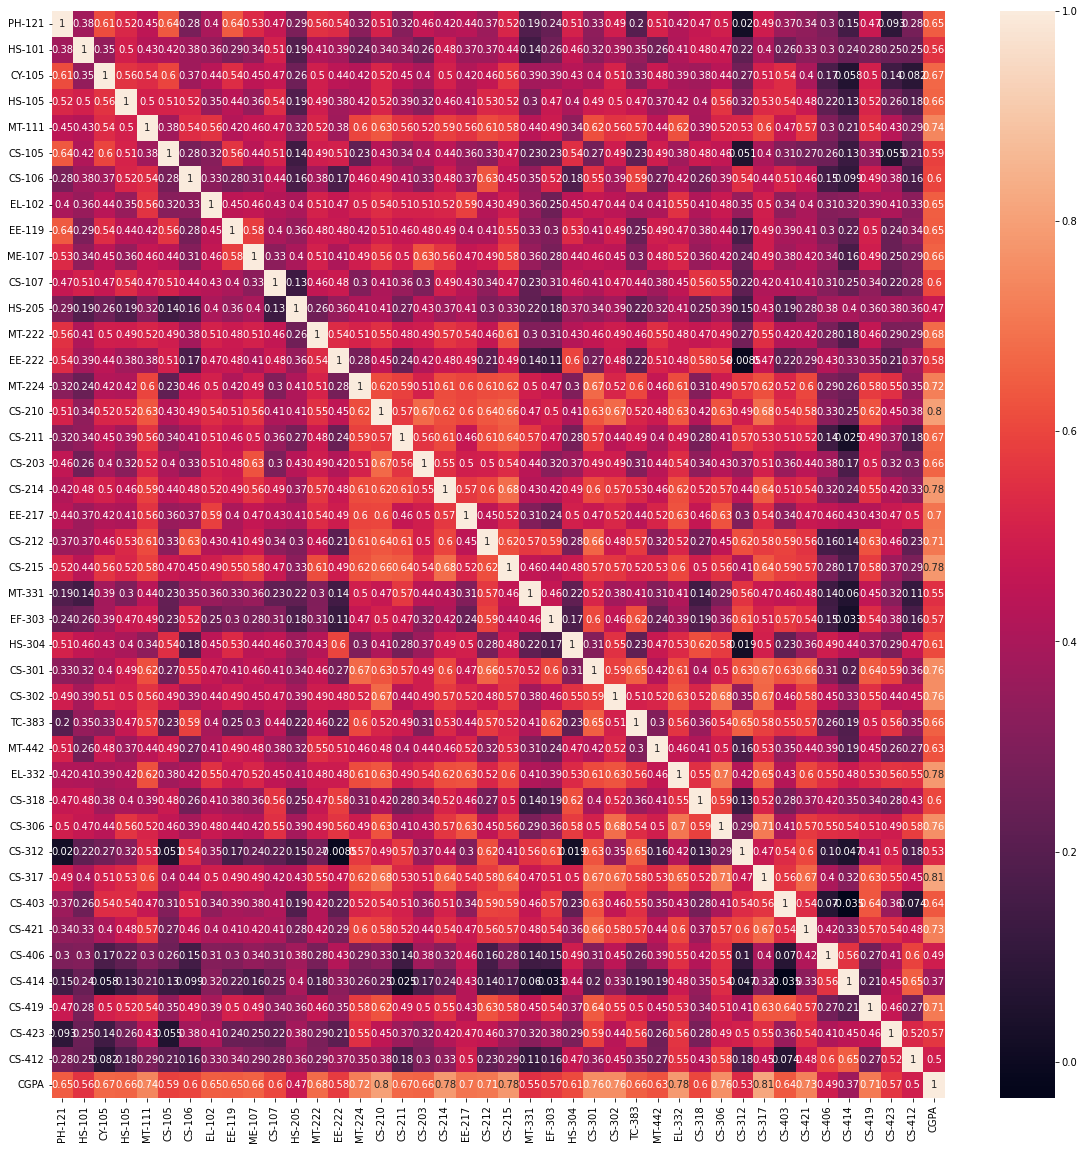

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(DF.corr(),annot=True)
plt.show()
# the heat map looks complicated but just focus on the last column the correlation of all the course GPAs are pretty strong as it should be.

In [26]:
# removing target variable
Z=DF.drop(['CGPA'],axis='columns')
Z

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


#  Creating Models

### First Model ( prediction of final CGPA based on GPs of first 3 years using Linear Regression & Decision Tree Regressor )

### a) Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am

LinearRegression()

In [28]:
# filters for selecting only first 3 year courses
first_three_years=Z
for column in Z.columns[Z.columns.str.contains('-4')]:
    first_three_years.drop([column],axis='columns',inplace=True)

first_three_years

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.0,3.7,3.7,4.0,4.0,4.0,4.0,3.4,3.7,3.7
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0


In [29]:
# confirms no final year courses
first_three_years.columns[first_three_years.columns.str.contains('-4')]

Index([], dtype='object')

In [30]:
first_three_years.shape

(547, 33)

In [31]:
am.fit(first_three_years,DF['CGPA'])

LinearRegression()

In [32]:
Yhat=am.predict(first_three_years)
Yhat[0:5]

array([2.15370365, 1.91168072, 3.55474112, 1.82410232, 3.46891893])

In [33]:
DF.loc[0:5,'CGPA']

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

## We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


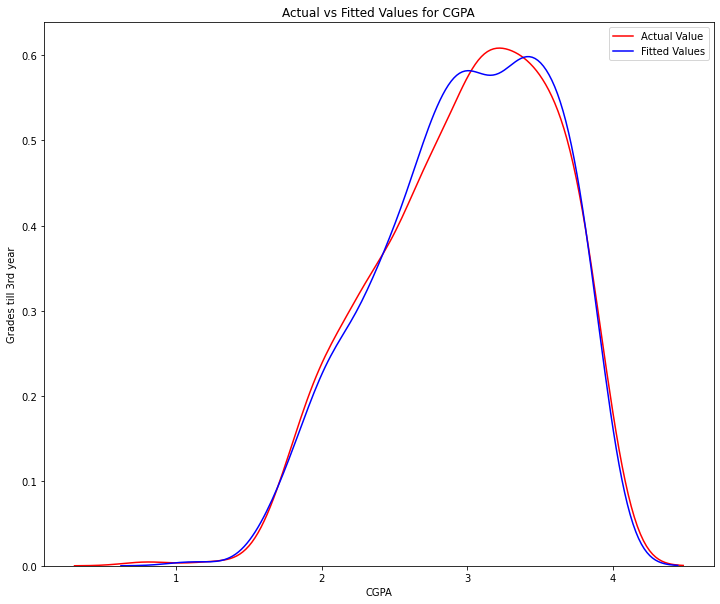

In [34]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(DF['CGPA'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for CGPA')
plt.xlabel('CGPA')
plt.ylabel('Grades till 3rd year')

plt.legend()
plt.show()
plt.close()

## R-score & Mean Squared Error  Of Linear Regression

In [35]:
from sklearn.metrics import mean_squared_error
R_model1_lm=am.score(first_three_years,DF['CGPA'])*100

mse_model1_lm = mean_squared_error(DF['CGPA'],Yhat)

In [36]:
print(" R^2: {:.2f} %".format(R_model1_lm))
print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model1_lm))

 R^2: 96.34 %
The mean square error of CGPA and predicted value is: 0.01261


## b) Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,Y_train,Y_test = train_test_split(first_three_years,DF[['CGPA']],test_size=0.40,random_state=0)
decisiontree = DecisionTreeRegressor()
dec_tree = decisiontree.fit(X_train, Y_train)

In [38]:
Yhat2=dec_tree.predict(X_test)

In [39]:
Yhat2[0:5]

array([2.851, 3.218, 2.206, 3.167, 2.775])

In [40]:
DF.loc[0:5,'CGPA']

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

## R-score & MSE Of Decision Tree 

In [41]:
R_model1_DT=dec_tree.score(X_test,Y_test)*100

mse_model1_DT = mean_squared_error(Y_test,Yhat2)

In [42]:

print("Test set R^2: {:.2f} %".format(R_model1_DT))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model1_DT))

Test set R^2: 84.39 %
The mean square error of CGPA and predicted value is: 0.05541


# Second Model  ( prediction of final CGPA based on GPs of first two years using KNN & SVM )

In [43]:
# filtering out for first two years
first_two_years=first_three_years
for column in first_three_years.columns[first_three_years.columns.str.contains('-3')]:
    first_two_years.drop([column],axis='columns',inplace=True)
first_two_years
    

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4


In [44]:
first_two_years.columns[first_two_years.columns.str.contains('-3')]

Index([], dtype='object')

## a) KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(first_two_years, DF['CGPA'],test_size=0.4 ,random_state=0)

In [46]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
# print("Test set predictions:\n{}".format(KNN.predict(X_test)))

## R-score & Mean Squared Error Of KNN

In [47]:
R_model2_KNN=KNN.score(X_test, y_test)*100
mse_model2_KNN = mean_squared_error(y_test,y_pred)

In [48]:
print("Test set R^2: {:.2f} %".format(R_model2_KNN))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model2_KNN))

Test set R^2: 91.49 %
The mean square error of CGPA and predicted value is: 0.03023


## b) SVM

In [49]:
from sklearn.svm import SVR
X_train,X_test,Y_train,Y_test = train_test_split(first_two_years, DF['CGPA'],test_size=0.50,random_state=0)

In [50]:
sv = SVR(kernel='linear')
sv.fit(X_train, Y_train)

SVR(kernel='linear')

In [51]:
X_train.shape

(273, 22)

In [52]:
y_pred2 = sv.predict(X_test)

## R-score & Mean Squared Error Of SVM

In [53]:
R_model2_SVM=sv.score(X_test, Y_test)*100
mse_model2_SVM = mean_squared_error(Y_test,y_pred2)

In [54]:
print("Test set R^2: {:.2f} %".format(R_model2_SVM))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model2_SVM))

Test set R^2: 94.53 %
The mean square error of CGPA and predicted value is: 0.01846


## Third Model ( prediction of final CGPA based on GPs of first year using Linear Regression & GPR )

In [55]:
first_year=first_two_years
for column in Z.columns[Z.columns.str.contains('-2')]:
    first_two_years.drop([column],axis='columns',inplace=True)
first_year

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0


## a) Linear Regression

In [56]:
lm2 = LinearRegression()
lm2
lm2.fit(first_year,DF['CGPA'])

LinearRegression()

In [57]:
pred=lm2.predict(first_year)

## R-score & Mean Squared Error Of Linear Regression

In [58]:
R_model3_lr=lm2.score(first_year, DF['CGPA'])*100
mse_model3_lr = mean_squared_error(DF['CGPA'],pred)

In [59]:

print(" R^2: {:.2f} %".format(R_model3_lr))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model3_lr))

 R^2: 84.30 %
The mean square error of CGPA and predicted value is: 0.05407


## b) Gaussian Process Regression

In [60]:
from sklearn.gaussian_process.kernels import RBF
import sklearn.gaussian_process as gp


In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(first_year,DF[['CGPA']],test_size=0.40,random_state=0)

In [62]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [63]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

In [64]:
model.fit(X_train, Y_train)
params = model.kernel_.get_params()

In [65]:
pred2 = model.predict(X_test)

## R-score & Mean Squared Error Of Gaussian Process Regression

In [66]:
R_model3_GPR=model.score(X_test, Y_test)*100
mse_model3_GPR = mean_squared_error(Y_test,pred2)

In [67]:

print("Test set R^2: {:.2f} %".format(model.score(X_test, Y_test)*100))

print("The mean square error of CGPA and predicted value is: {:.5f}".format(mse_model3_GPR))

Test set R^2: 85.73 %
The mean square error of CGPA and predicted value is: 0.05067


## R-score & Mean Squared Error of all models

In [68]:
print(" R^2 of linear regression of first model : {:.2f} %".format(R_model1_lm))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model1_lm))

print("Test set R^2 Decision Tree of first model: {:.2f} %".format(R_model1_DT))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model1_DT))

print("Test set R^2 KNN of second model: {:.2f} %".format(R_model2_KNN))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model2_KNN))


print("Test set R^2 of SVM second model: {:.2f} %".format(R_model2_SVM))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model2_SVM))

print(" R^2 linear regression third model: {:.2f} %".format(R_model3_lr))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model3_lr))

print("Test set GPR third model R^2: {:.2f} %".format(model.score(X_test, Y_test)*100))
print("The mean square error of CGPA and predicted value is: {:.5f}\n".format(mse_model3_GPR))

 R^2 of linear regression of first model : 96.34 %
The mean square error of CGPA and predicted value is: 0.01261

Test set R^2 Decision Tree of first model: 84.39 %
The mean square error of CGPA and predicted value is: 0.05541

Test set R^2 KNN of second model: 91.49 %
The mean square error of CGPA and predicted value is: 0.03023

Test set R^2 of SVM second model: 94.53 %
The mean square error of CGPA and predicted value is: 0.01846

 R^2 linear regression third model: 84.30 %
The mean square error of CGPA and predicted value is: 0.05407

Test set GPR third model R^2: 85.73 %
The mean square error of CGPA and predicted value is: 0.05067

